## data importation


In [143]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
from sklearn.cluster import KMeans


from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py


df = pd.read_csv('output.csv')
df1= pd.read_csv('output.csv')
df2= pd.read_csv('output.csv')

df.head()

Attrition_Flag Gender Education_Level Marital_Status Card_Category  \
0  Existing Customer      M     High School        Married          Gold   
1  Existing Customer      F        Graduate         Single      Platinum   
2  Existing Customer      M        Graduate        Married        Silver   
3  Existing Customer      F     High School        Unknown     Signature   
4  Existing Customer      M      Uneducated        Married        Silver   

  Verification_Status               Loan_Title  start_date    end_date  \
0     Source Verified         Home improvement  01/11/2011  30/11/2011   
1     Source Verified  Credit card refinancing  01/11/2011  30/11/2011   
2     Source Verified       Debt consolidation  01/11/2011  30/11/2011   
3            Verified       Debt Consolidation  01/11/2011  30/11/2011   
4            Verified       Debt consolidation  01/11/2011  30/11/2011   

             bank_name  ...     EndDate RefundTypeREF RefundFREF  \
0       Allahabad Bank  ...  01/12/2015        I10874     B66381   
1          Andhra Bank  ...  01/12/2015        I07845     B86225   
2       Bank of Baroda  ...  02/12/2015        I19196     B79029   
3        Bank of India  ...  02/12/2015        I01897     B99672   
4  Bank of Maharashtra  ...  02/11/2015        I07456     B54087   

  CustomerREF.1 CustomerDOB CustLocation CustAccountBalance TransactionDate.1  \
0        G72090  10/01/1994   JAMSHEDPUR           17819.05        02/08/2016   
1        G87444  04/04/1957      JHAJJAR            2270.69        02/08/2016   
2        G48303  26/11/1996       MUMBAI           17874.44        02/08/2016   
3        G51567  14/09/1973       MUMBAI          866503.21        02/08/2016   
4        G36489  24/03/1988  NAVI MUMBAI            6714.43        02/08/2016   

   TransactionTime  TransactionAmount (INR)  
0           143207                     25.0  
1           141858                  27999.0  
2           142712                    459.0  
3           142714                   2060.0  
4           181156                   1762.5  

[5 rows x 37 columns]

## EDA

In [38]:
# Checking data types of each column
df.dtypes

Attrition_Flag              object
Gender                      object
Education_Level             object
Marital_Status              object
Card_Category               object
Verification_Status         object
Loan_Title                  object
start_date                  object
end_date                    object
bank_name                   object
TransactionDate             object
Client_REF                  object
Credit_Card_REF             object
RefundF_REF                 object
Point_RewardF_REF           object
Fraud_DetectionF_REF        object
Spending_Categ_REF          object
Location_REF                object
Loan_Amount                float64
Funded_Amount              float64
Term                       float64
Interest_Rate               object
Verification_Status.1       object
Loan_Title.1                object
CustomerREF                 object
Term_Year                  float64
StartDate                   object
EndDate                     object
RefundTypeREF       

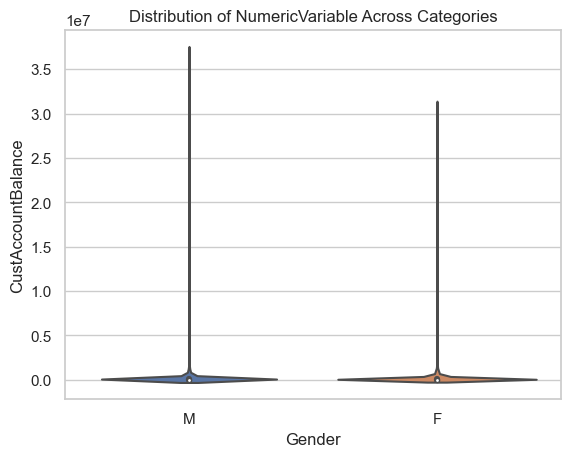

In [39]:
sns.violinplot(data=df, x='Gender', y='CustAccountBalance')
plt.title('Distribution of NumericVariable Across Categories')
plt.show()

In [40]:
# Summarizing the statistical properties of the dataset
df.describe(include='all')

# Identifying missing values in the dataset
df.isnull().sum()

Attrition_Flag              0
Gender                      0
Education_Level             0
Marital_Status              0
Card_Category               0
Verification_Status         0
Loan_Title                  0
start_date                  0
end_date                    0
bank_name                   3
TransactionDate             0
Client_REF                  0
Credit_Card_REF             0
RefundF_REF                 0
Point_RewardF_REF           0
Fraud_DetectionF_REF        0
Spending_Categ_REF          0
Location_REF                0
Loan_Amount                 0
Funded_Amount               0
Term                        0
Interest_Rate               0
Verification_Status.1       0
Loan_Title.1                0
CustomerREF                 0
Term_Year                   0
StartDate                   0
EndDate                     0
RefundTypeREF               0
RefundFREF                  0
CustomerREF.1               0
CustomerDOB                33
CustLocation                1
CustAccoun

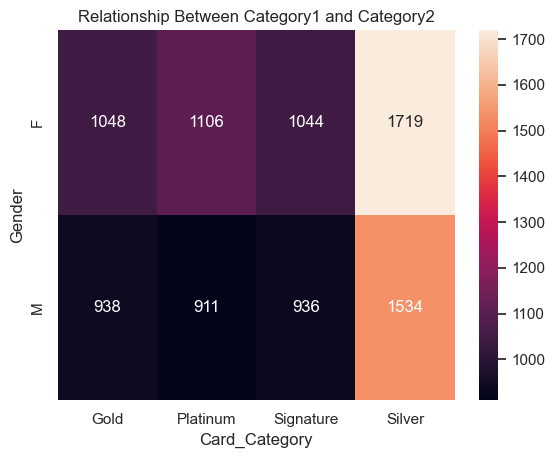

In [41]:
heatmap_data = pd.crosstab(df['Gender'], df['Card_Category'])
sns.heatmap(heatmap_data, annot=True, fmt='d')
plt.title('Relationship Between Category1 and Category2')
plt.show()

In [42]:
"""sns.swarmplot(data=df, x='Gender', y='TransactionAmount (INR)')
plt.title('Swarm Plot of NumericVariable Across Categories')
plt.show()"""

"sns.swarmplot(data=df, x='Gender', y='TransactionAmount (INR)')\nplt.title('Swarm Plot of NumericVariable Across Categories')\nplt.show()"

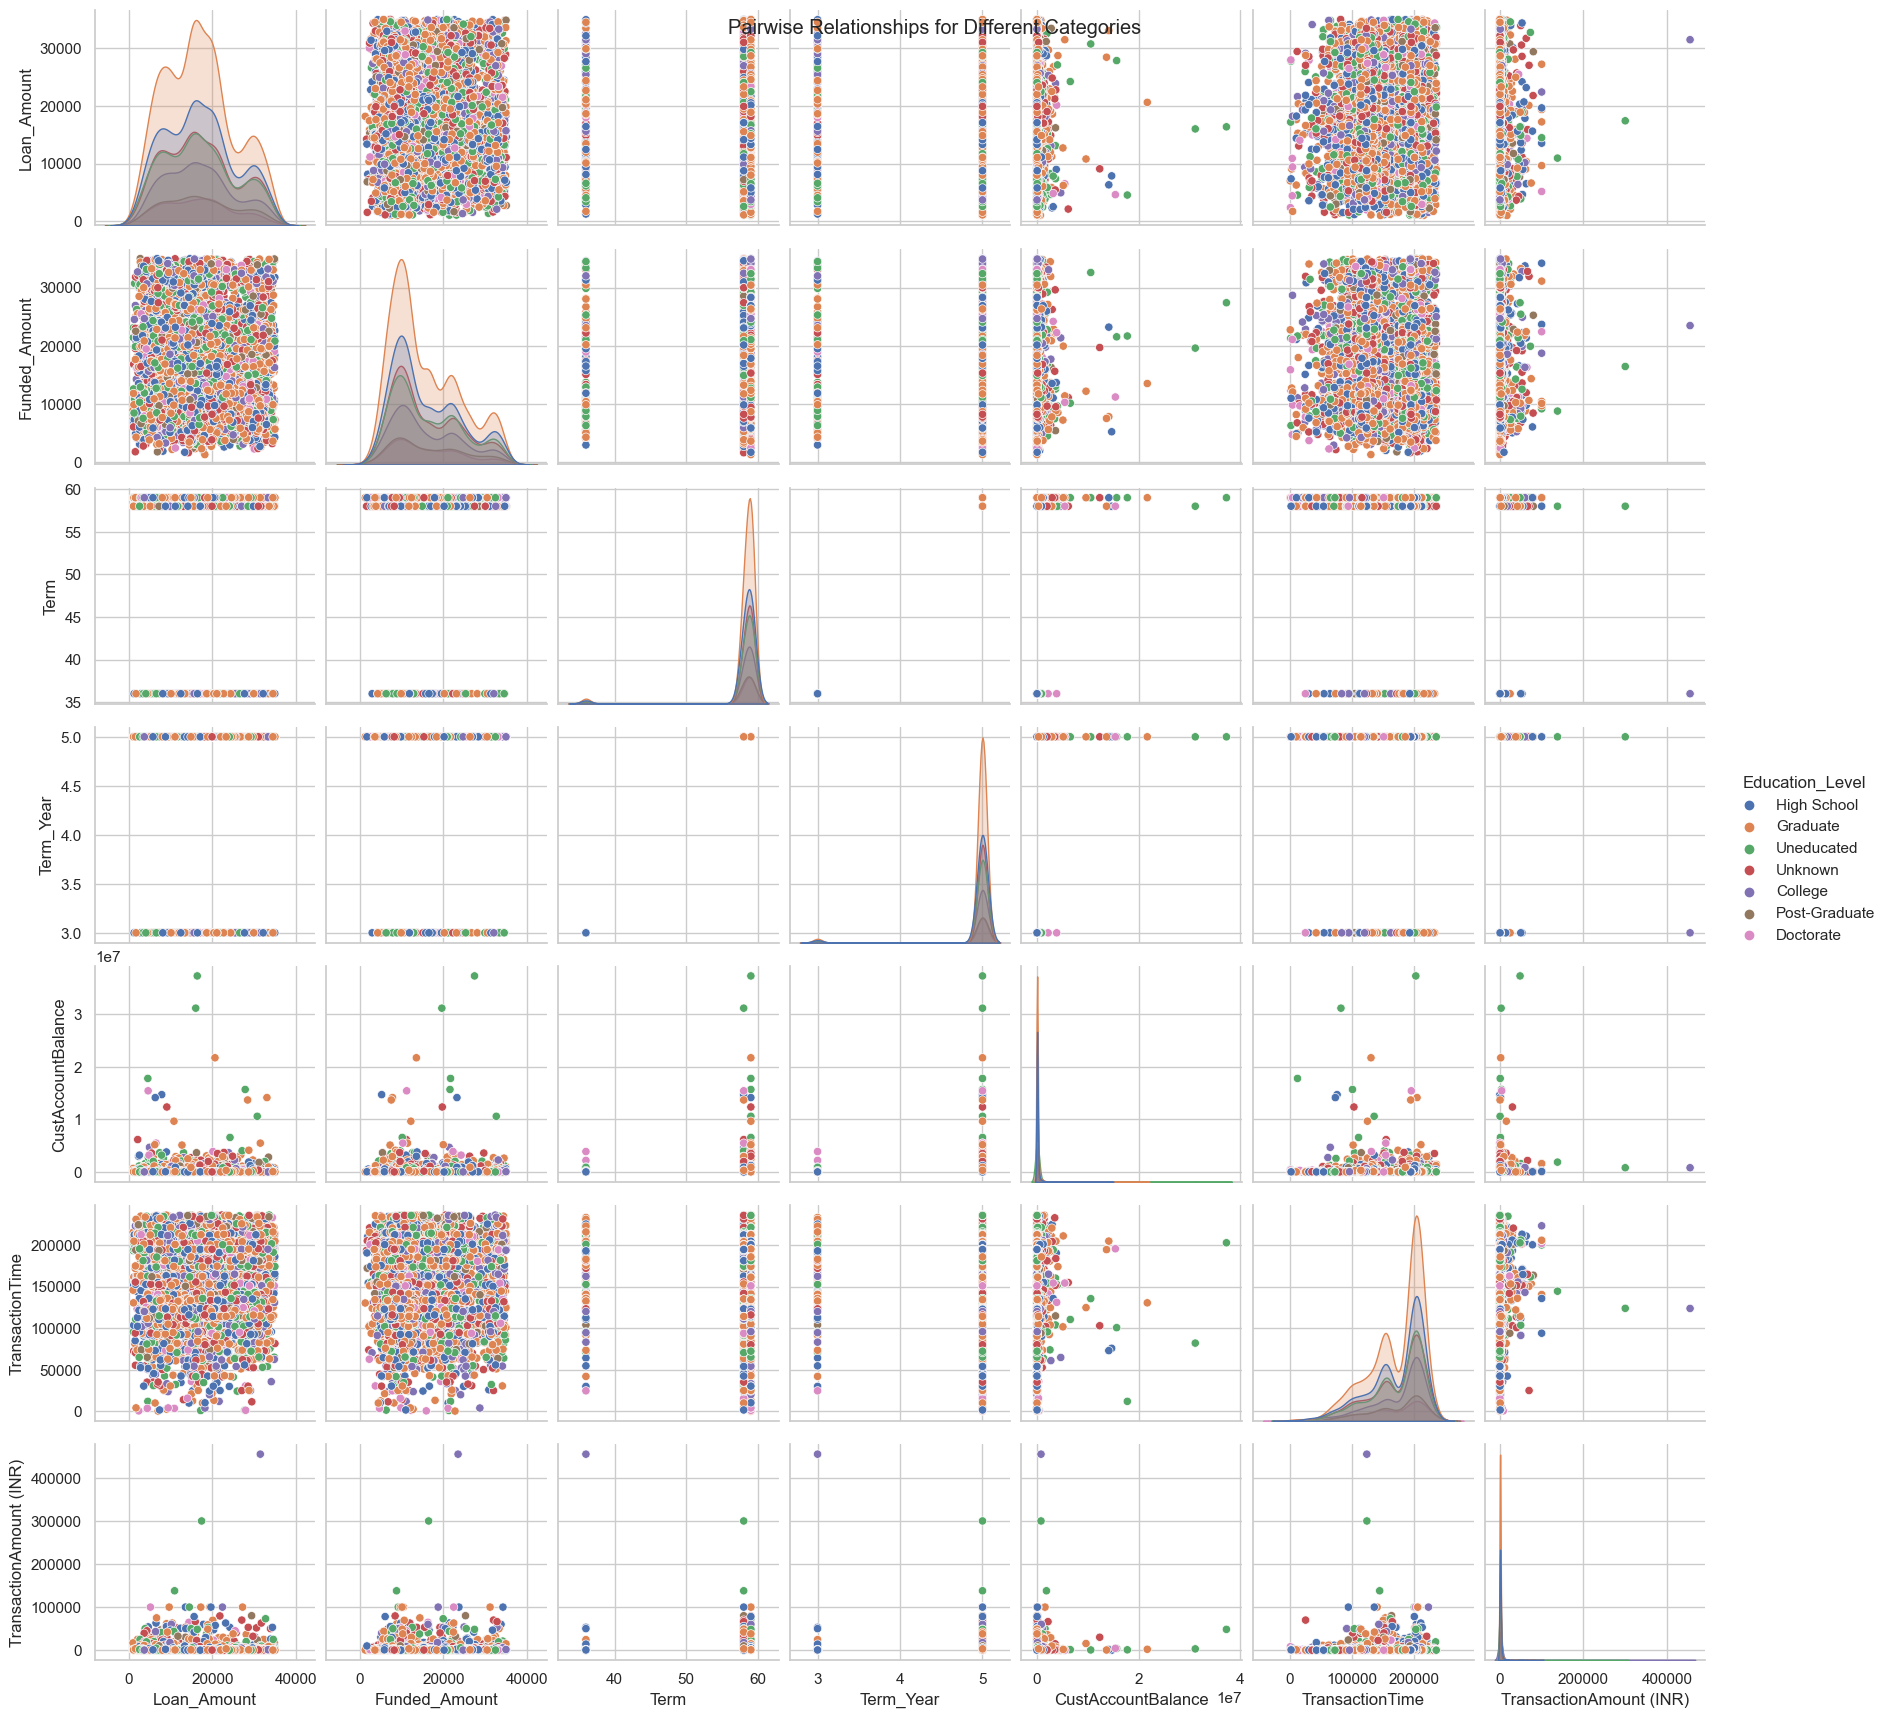

In [43]:
sns.pairplot(df, hue='Education_Level', markers='o')
plt.suptitle('Pairwise Relationships for Different Categories')
plt.show()

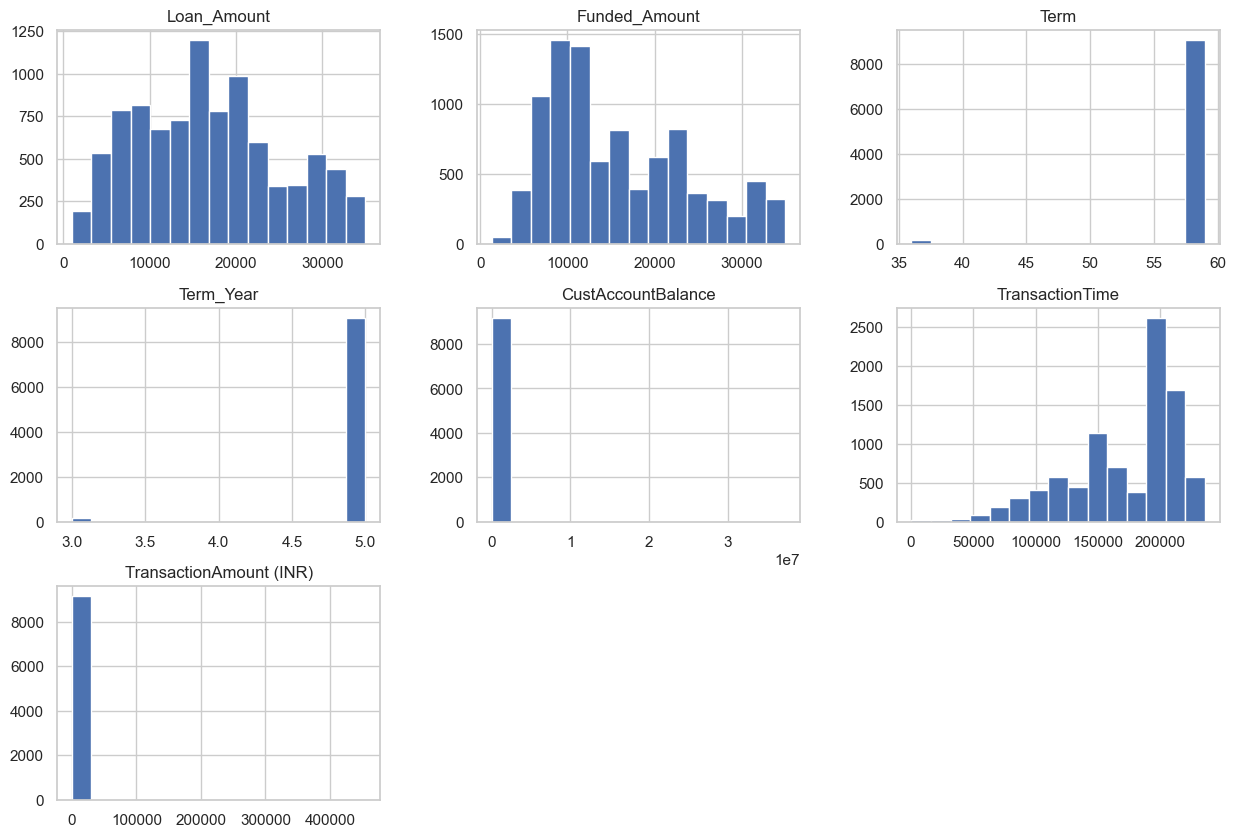

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style='whitegrid')

# Histograms for numerical columns
df.hist(bins=15, figsize=(15, 10))
plt.show()

## Data Preprocessing

In [45]:

import numpy as np

# Handling NaN values
df.replace([np.inf, -np.inf], np.nan, inplace=True) # Replace infinities with NaN
df.dropna(inplace=True) # Drop rows with NaN values

# Checking the shape of the dataset after preprocessing
print('Dataset shape:', df.shape)

Dataset shape: (9186, 37)


In [46]:
df.columns

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Card_Category', 'Verification_Status', 'Loan_Title', 'start_date',
       'end_date', 'bank_name', 'TransactionDate', 'Client_REF',
       'Credit_Card_REF', 'RefundF_REF', 'Point_RewardF_REF',
       'Fraud_DetectionF_REF', 'Spending_Categ_REF', 'Location_REF',
       'Loan_Amount', 'Funded_Amount', 'Term', 'Interest_Rate',
       'Verification_Status.1', 'Loan_Title.1', 'CustomerREF', 'Term_Year',
       'StartDate', 'EndDate', 'RefundTypeREF', 'RefundFREF', 'CustomerREF.1',
       'CustomerDOB', 'CustLocation', 'CustAccountBalance',
       'TransactionDate.1', 'TransactionTime', 'TransactionAmount (INR)'],
      dtype='object')

### PCA

In [47]:
# Principal Component Analysis (PCA)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Standardizing the Data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.select_dtypes(include=[np.number]))

# Handling any NaN values that may have been introduced during scaling
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df_scaled = imputer.fit_transform(df_scaled)

# Applying PCA
pca = PCA(n_components=2) # Using 2 components for visualization purposes
principalComponents = pca.fit_transform(df_scaled)
print('Explained variance ratio:', pca.explained_variance_ratio_)

Explained variance ratio: [0.2846618  0.15639208]


## MODELING

### DBSCAN Clustering


In [48]:
from sklearn.cluster import DBSCAN

# Applying DBSCAN to the principal components
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(principalComponents)

# Adding the cluster labels to the original dataframe
df['Cluster'] = clusters

# Displaying the first few rows with cluster labels
df.head()

Attrition_Flag Gender Education_Level Marital_Status Card_Category  \
0  Existing Customer      M     High School        Married          Gold   
1  Existing Customer      F        Graduate         Single      Platinum   
2  Existing Customer      M        Graduate        Married        Silver   
3  Existing Customer      F     High School        Unknown     Signature   
4  Existing Customer      M      Uneducated        Married        Silver   

  Verification_Status               Loan_Title  start_date    end_date  \
0     Source Verified         Home improvement  01/11/2011  30/11/2011   
1     Source Verified  Credit card refinancing  01/11/2011  30/11/2011   
2     Source Verified       Debt consolidation  01/11/2011  30/11/2011   
3            Verified       Debt Consolidation  01/11/2011  30/11/2011   
4            Verified       Debt consolidation  01/11/2011  30/11/2011   

             bank_name  ... RefundTypeREF RefundFREF CustomerREF.1  \
0       Allahabad Bank  ...        I10874     B66381        G72090   
1          Andhra Bank  ...        I07845     B86225        G87444   
2       Bank of Baroda  ...        I19196     B79029        G48303   
3        Bank of India  ...        I01897     B99672        G51567   
4  Bank of Maharashtra  ...        I07456     B54087        G36489   

  CustomerDOB CustLocation CustAccountBalance TransactionDate.1  \
0  10/01/1994   JAMSHEDPUR           17819.05        02/08/2016   
1  04/04/1957      JHAJJAR            2270.69        02/08/2016   
2  26/11/1996       MUMBAI           17874.44        02/08/2016   
3  14/09/1973       MUMBAI          866503.21        02/08/2016   
4  24/03/1988  NAVI MUMBAI            6714.43        02/08/2016   

  TransactionTime  TransactionAmount (INR)  Cluster  
0          143207                     25.0        0  
1          141858                  27999.0        0  
2          142712                    459.0        0  
3          142714                   2060.0        0  
4          181156                   1762.5        0  

[5 rows x 38 columns]

In [49]:
# input matrix for segmentation
x = df[['CustAccountBalance','TransactionTime','TransactionAmount (INR)']].values
x1= df[['CustAccountBalance','Funded_Amount','TransactionAmount (INR)']].values

In [50]:
df[['CustAccountBalance','TransactionTime','TransactionAmount (INR)']].head()

CustAccountBalance  TransactionTime  TransactionAmount (INR)
0            17819.05           143207                     25.0
1             2270.69           141858                  27999.0
2            17874.44           142712                    459.0
3           866503.21           142714                   2060.0
4             6714.43           181156                   1762.5

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default val

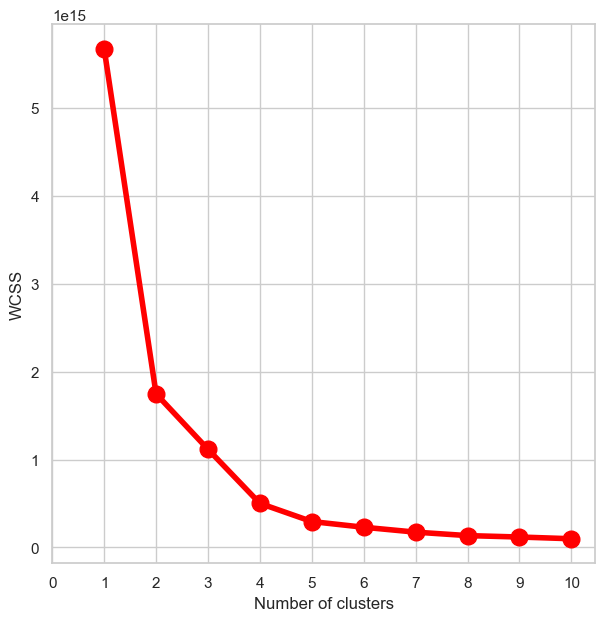

In [51]:
# find the optimal number of clusters using elbow method  
#-- >This is for 3 features = [CustAccountBalance,TransactionTime,TransactionAmount (INR)]

WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'red')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default val

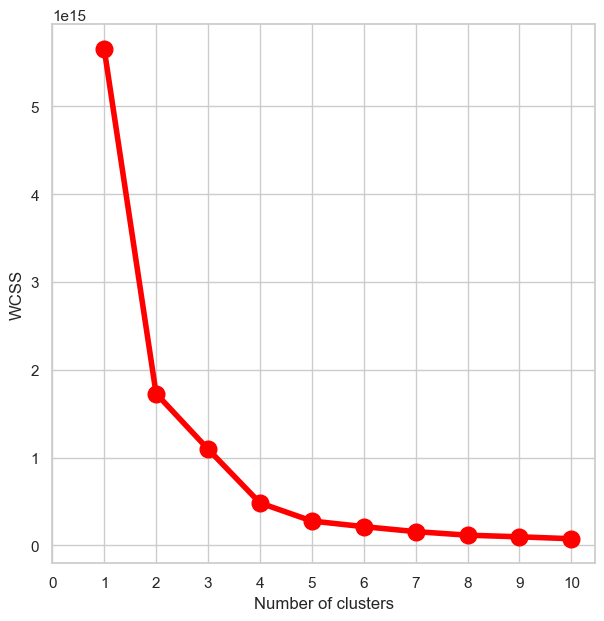

In [52]:
# find the optimal number of clusters using elbow method  
#-- >This is for 3 features = [CustAccountBalance,TransactionTime,TransactionAmount (INR)]

WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x1)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'red')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [53]:
# finding the clusters based on input matrix "x"
model = KMeans(n_clusters = 5, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)

In [54]:
# finding the clusters based on input matrix "x"
model = KMeans(n_clusters = 5, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters1 = model.fit_predict(x1)

<Axes: ylabel='count'>

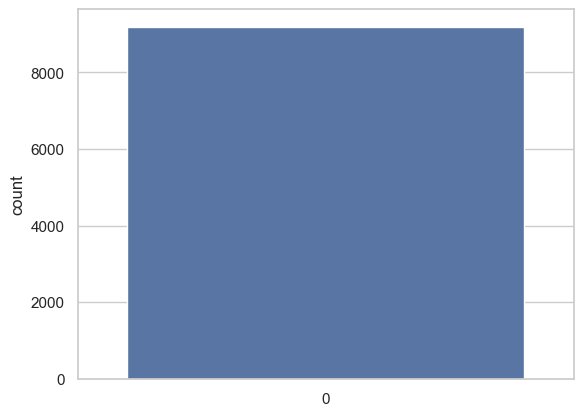

In [55]:
# countplot to check the number of clusters and number of customers in each cluster
sns.countplot(y_clusters)

<Axes: ylabel='count'>

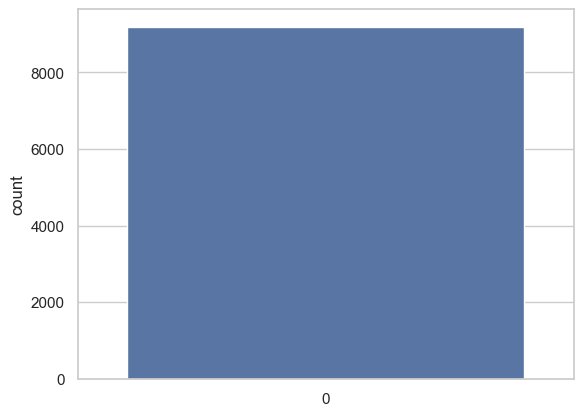

In [56]:
# countplot to check the number of clusters and number of customers in each cluster
sns.countplot(y_clusters1)

In [57]:
print(x[y_clusters == 0,0][1])
print(x[y_clusters == 0,1][1])
print(x[y_clusters == 0,2][1])

2270.69
141858.0
27999.0


In [58]:
print(x[y_clusters1 == 0,0][1])
print(x[y_clusters1 == 0,1][1])
print(x[y_clusters1 == 0,2][1])

2270.69
141858.0
27999.0


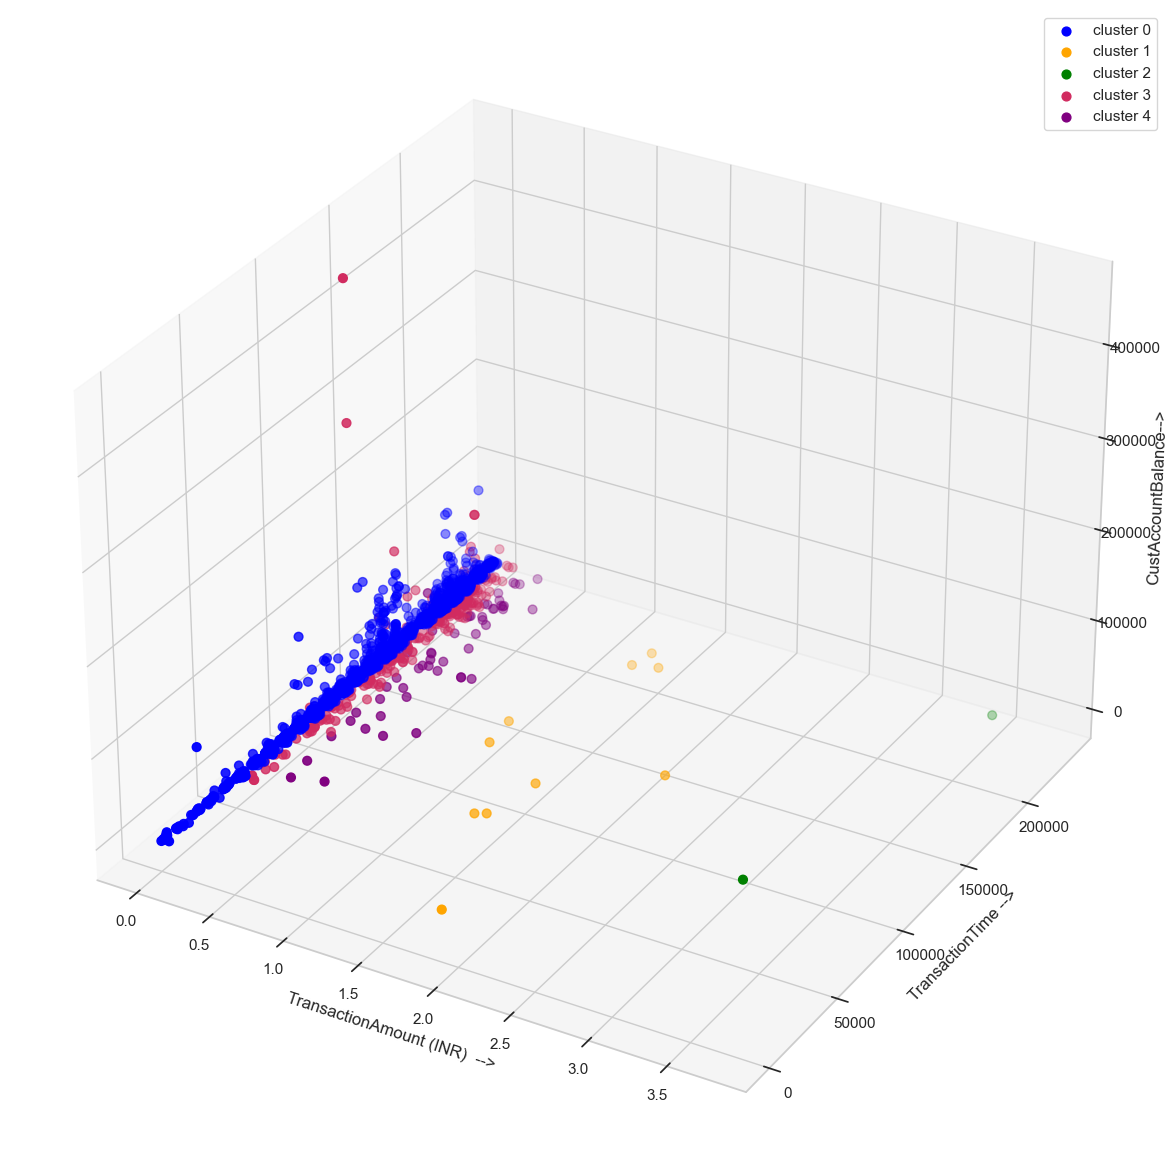

In [59]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],x[y_clusters == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],x[y_clusters == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],x[y_clusters == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(x[y_clusters == 3,0],x[y_clusters == 3,1],x[y_clusters == 3,2], s = 40 , color = '#D12B60', label = "cluster 3")
ax.scatter(x[y_clusters == 4,0],x[y_clusters == 4,1],x[y_clusters == 4,2], s = 40 , color = 'purple', label = "cluster 4")
ax.set_xlabel('TransactionAmount (INR)  -->')
ax.set_ylabel('TransactionTime -->')
ax.set_zlabel('CustAccountBalance-->')
ax.legend()
plt.show()

In [60]:
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'TransactionAmount (INR) -->'),yaxis = dict(title  = 'CustAccountBalance--->'),zaxis = dict(title  = 'TransactionTime-->'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = model.labels_
trace = go.Scatter3d(x=x[:, 0], y=x[:, 1], z=x[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

In [61]:
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'CustAccountBalance -->'),yaxis = dict(title  = ' TransactionTime--->'),zaxis = dict(title  = 'TransactionAmount (INR)-->'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = model.labels_
trace = go.Scatter3d(x=x[:, 0], y=x[:, 1], z=x[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

### CAH (Hierarchical Clustering)


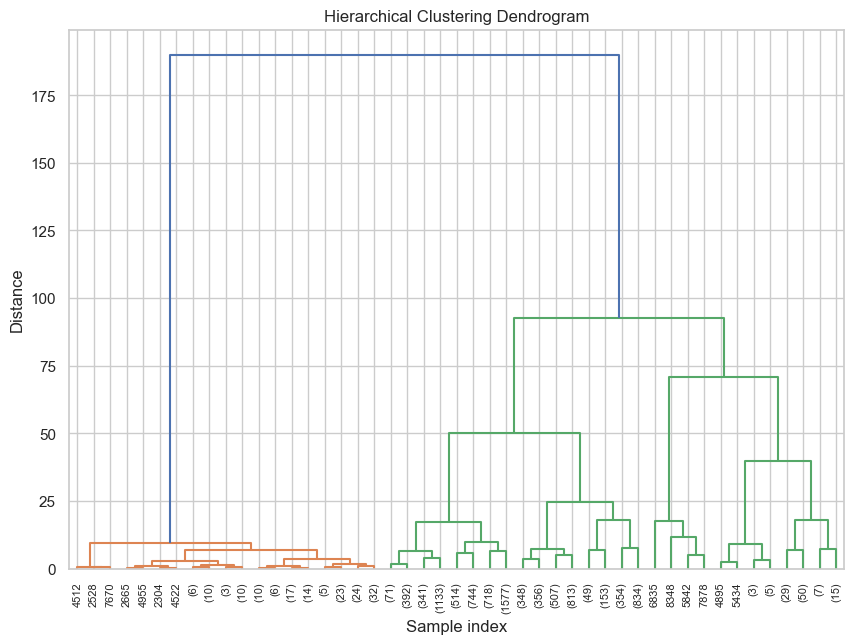

In [62]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Generating the linkage matrix
Z = linkage(principalComponents, 'ward')

# Plotting the dendrogram
plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(Z, truncate_mode='level', p=5) # Show only the last p merged clusters
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

## VIS

In [63]:
# Importing necessary libraries
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [64]:
# Select a subset of categorical columns for one-hot encoding
subset_columns = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Card_Category', 'Verification_Status']

# Perform one-hot encoding
df_onehot = pd.get_dummies(df[subset_columns])

# Show the first few rows of the one-hot encoded DataFrame
df_onehot.head()

Attrition_Flag_Attrited Customer  Attrition_Flag_Existing Customer  \
0                                 0                                 1   
1                                 0                                 1   
2                                 0                                 1   
3                                 0                                 1   
4                                 0                                 1   

   Gender_F  Gender_M  Education_Level_College  Education_Level_Doctorate  \
0         0         1                        0                          0   
1         1         0                        0                          0   
2         0         1                        0                          0   
3         1         0                        0                          0   
4         0         1                        0                          0   

   Education_Level_Graduate  Education_Level_High School  \
0                         0                            1   
1                         1                            0   
2                         1                            0   
3                         0                            1   
4                         0                            0   

   Education_Level_Post-Graduate  Education_Level_Uneducated  ...  \
0                              0                           0  ...   
1                              0                           0  ...   
2                              0                           0  ...   
3                              0                           0  ...   
4                              0                           1  ...   

   Marital_Status_Married  Marital_Status_Single  Marital_Status_Unknown  \
0                       1                      0                       0   
1                       0                      1                       0   
2                       1                      0                       0   
3                       0                      0                       1   
4                       1                      0                       0   

   Card_Category_Gold  Card_Category_Platinum  Card_Category_Signature  \
0                   1                       0                        0   
1                   0                       1                        0   
2                   0                       0                        0   
3                   0                       0                        1   
4                   0                       0                        0   

   Card_Category_Silver  Verification_Status_Not Verified  \
0                     0                                 0   
1                     0                                 0   
2                     1                                 0   
3                     0                                 0   
4                     1                                 0   

   Verification_Status_Source Verified  Verification_Status_Verified  
0                                    1                             0  
1                                    1                             0  
2                                    1                             0  
3                                    0                             1  
4                                    0                             1  

[5 rows x 22 columns]

In [65]:
# Handling NaN and Infinite Values
# Imputing missing values with the mean
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df_onehot), columns=df_onehot.columns)

# Checking for infinite values and replacing them
df_imputed.replace([np.inf, -np.inf], np.nan, inplace=True)

# Imputing any new missing values created by the above step
df_imputed = pd.DataFrame(imputer.fit_transform(df_imputed), columns=df_imputed.columns)

In [66]:
# Standardizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)

# Applying PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Creating a DataFrame for the PCA results
pca_df = pd.DataFrame(data = pca_result, columns = ['PCA1', 'PCA2'])

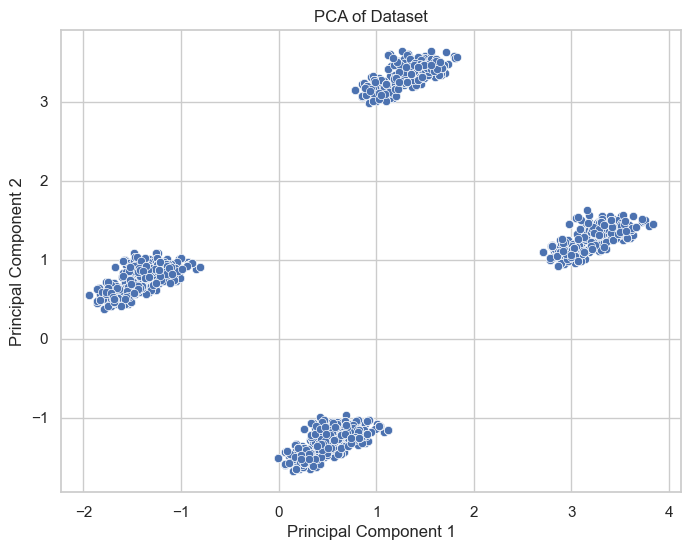

In [67]:
# Visualizing the PCA results
plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', data=pca_df)
plt.title('PCA of Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

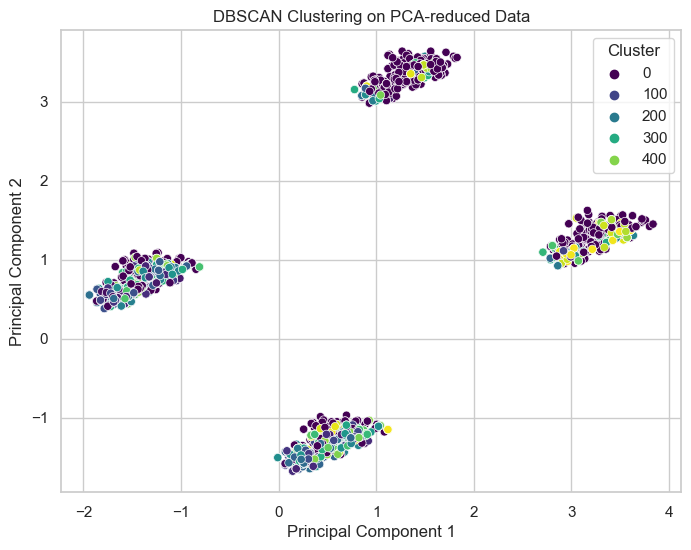

In [68]:
# DBSCAN Clustering
# Using DBSCAN with default parameters
clustering = DBSCAN().fit(df_scaled)

# Adding cluster labels to the PCA DataFrame
pca_df['Cluster'] = clustering.labels_

# Visualizing the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('DBSCAN Clustering on PCA-reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

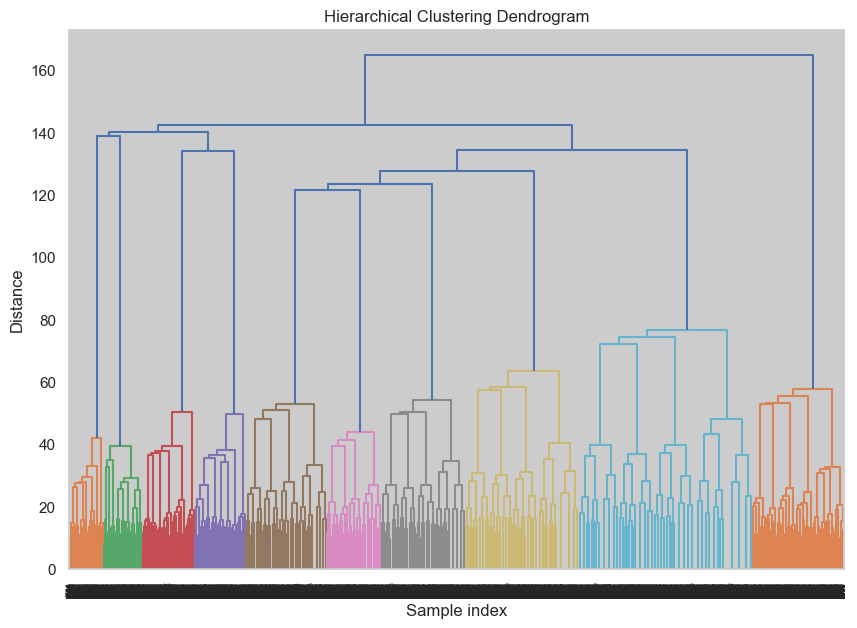

In [69]:
# CAH Clustering (Hierarchical Clustering)
# Using the linkage method for hierarchical clustering
linked = linkage(df_scaled, 'ward')

# Plotting the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [70]:
""" # Calculating the correlation of each feature with the principal components
pca_components = pca.components_.T
feature_correlation = np.corrcoef(df_scaled.T, pca_components.T)[0:len(df_onehot.columns), len(df_onehot.columns):]

# Plotting the correlation circle
plt.figure(figsize=(8, 8))
for i in range(len(feature_correlation)):
    plt.arrow(0, 0, feature_correlation[i, 0], feature_correlation[i, 1], head_width=0.05, head_length=0.05, color='r')
    plt.text(feature_correlation[i, 0], feature_correlation[i, 1], df.columns[i], color='g')

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Correlation Circle for PCA')
plt.grid()
plt.show() """

" # Calculating the correlation of each feature with the principal components\npca_components = pca.components_.T\nfeature_correlation = np.corrcoef(df_scaled.T, pca_components.T)[0:len(df_onehot.columns), len(df_onehot.columns):]\n\n# Plotting the correlation circle\nplt.figure(figsize=(8, 8))\nfor i in range(len(feature_correlation)):\n    plt.arrow(0, 0, feature_correlation[i, 0], feature_correlation[i, 1], head_width=0.05, head_length=0.05, color='r')\n    plt.text(feature_correlation[i, 0], feature_correlation[i, 1], df.columns[i], color='g')\n\nplt.xlim(-1, 1)\nplt.ylim(-1, 1)\nplt.xlabel('PCA1')\nplt.ylabel('PCA2')\nplt.title('Correlation Circle for PCA')\nplt.grid()\nplt.show() "

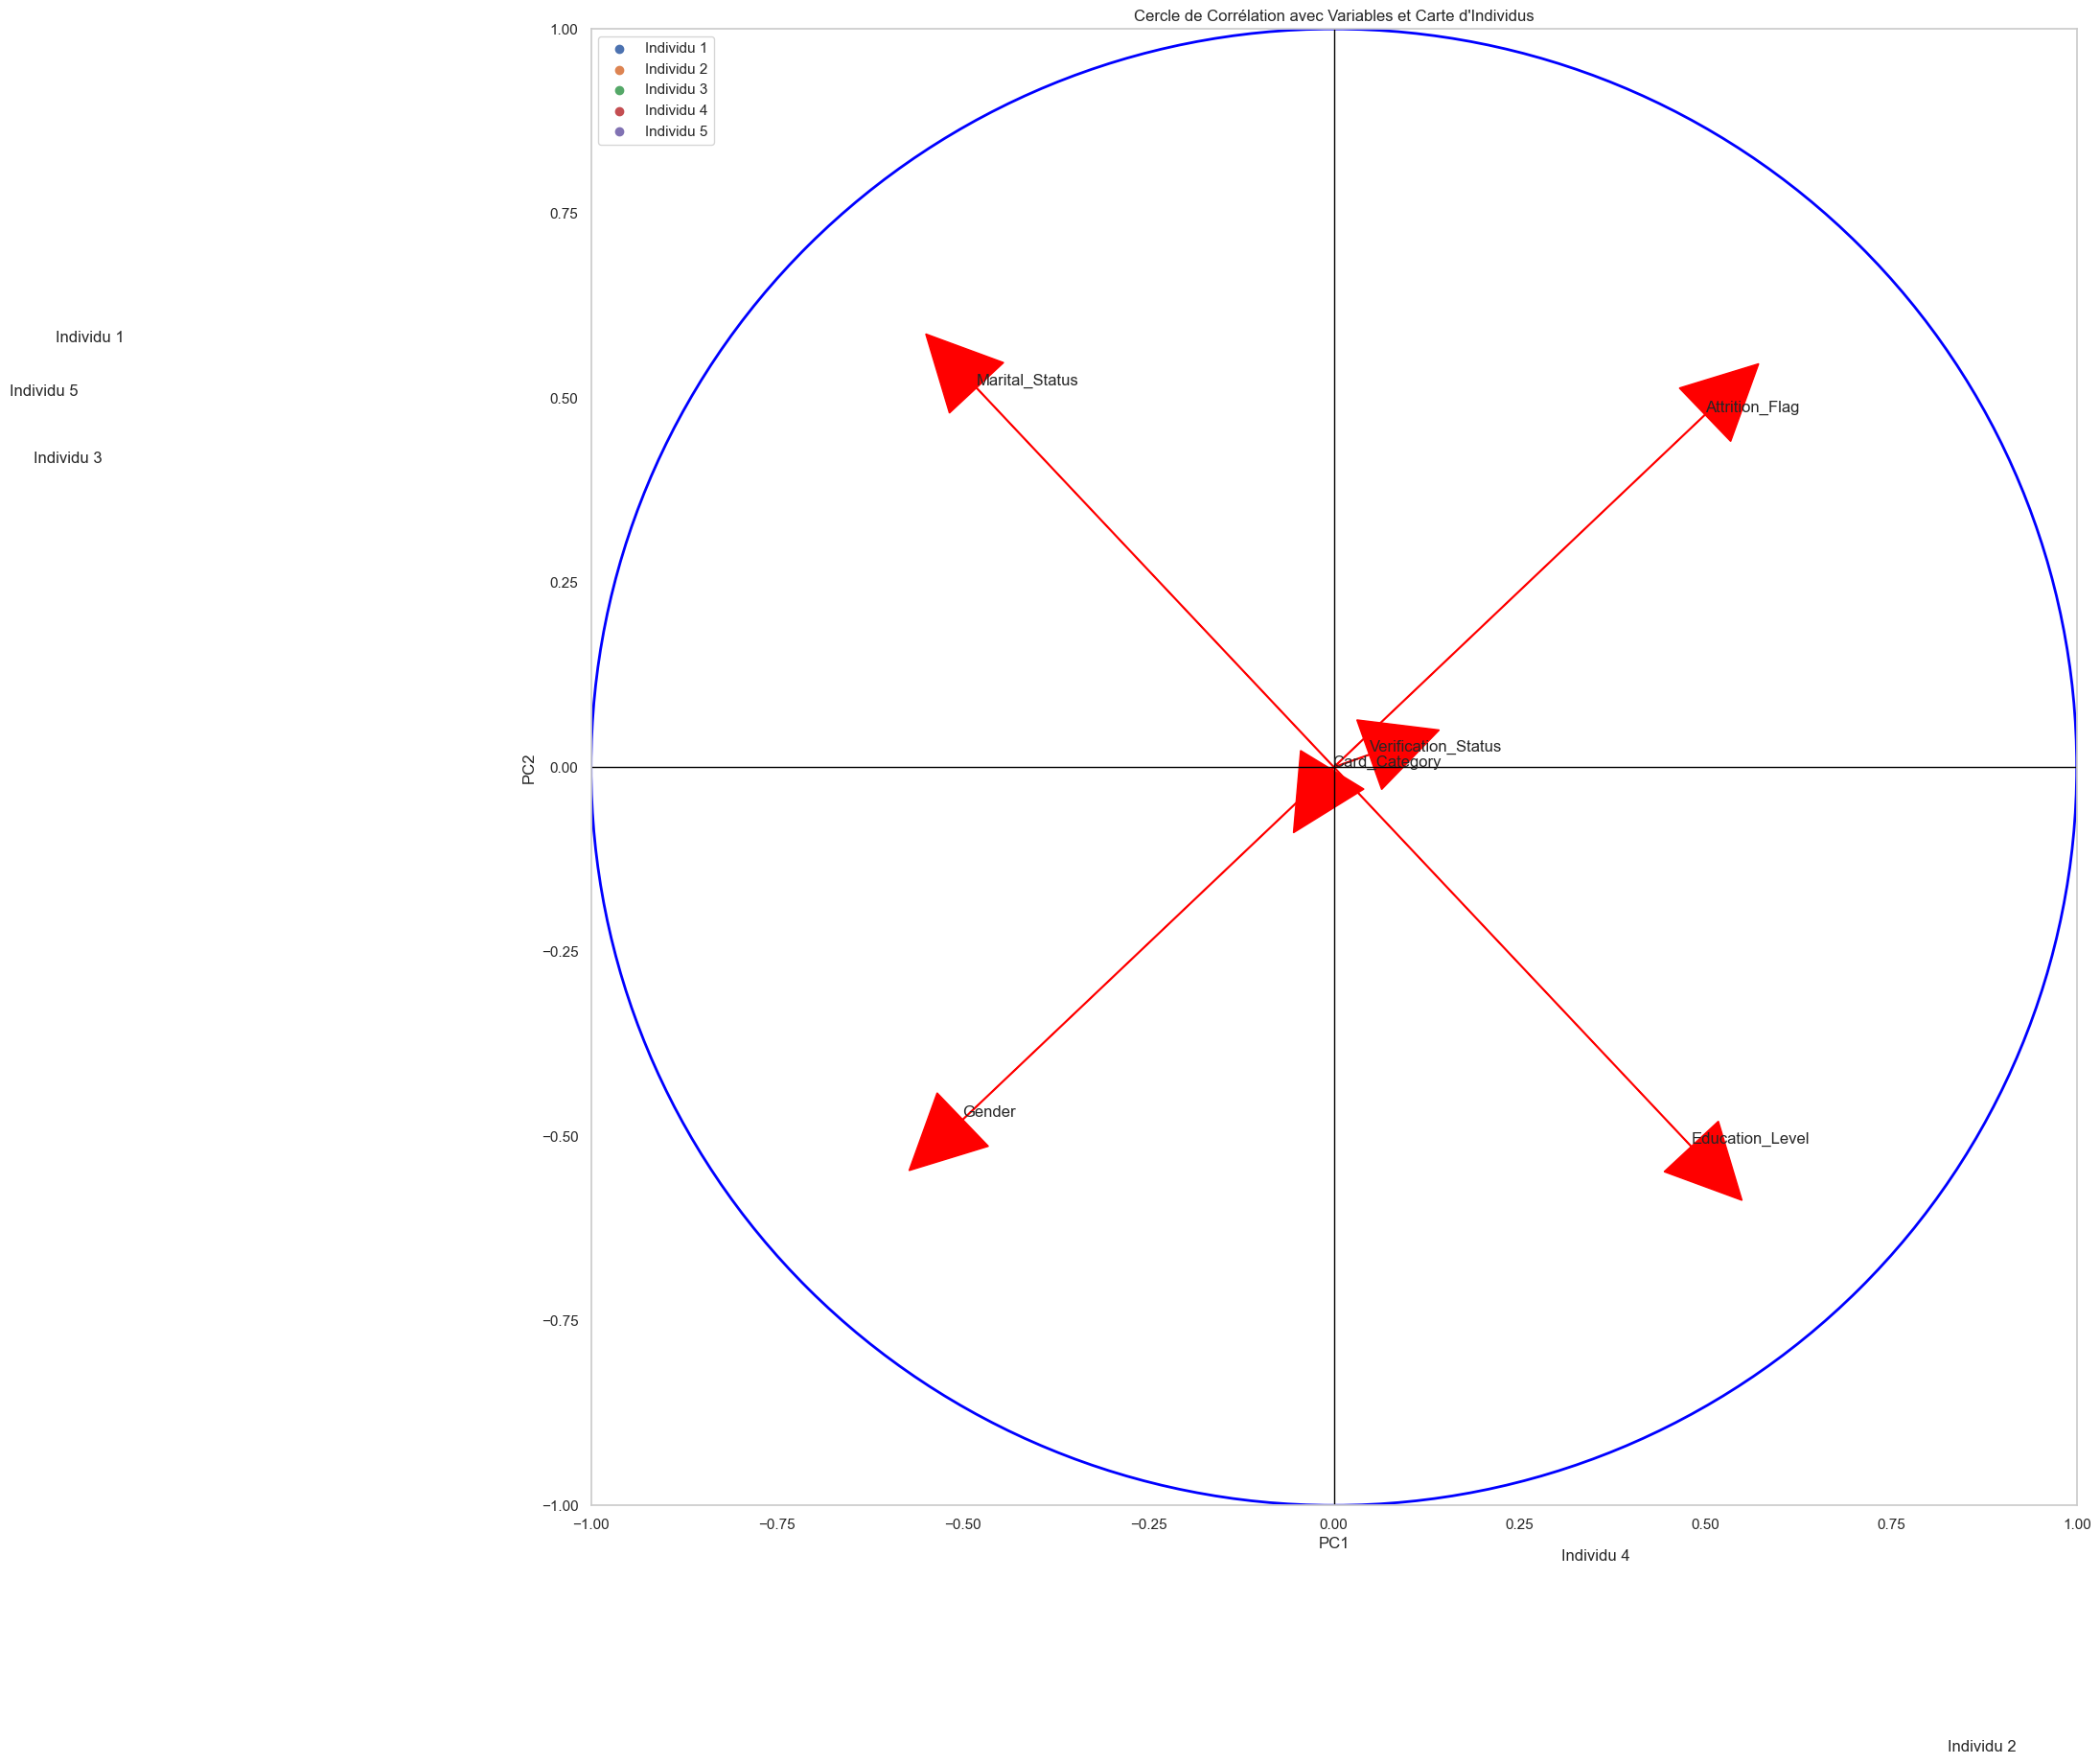

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# lire le dataset
data = df_scaled # Assurez-vous que X contient vos données

# Effectuez une analyse en composantes principales (PCA)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data)

# Récupérez les composantes principales (vecteurs propres)
components = pca.components_.T  # Transposez pour avoir les composantes par colonne

# Créez le cercle de corrélation avec une figure plus grande (par exemple, 12x12)
fig, ax = plt.subplots(figsize=(20, 20))
circle = plt.Circle((0, 0), 1, fill=False, color='blue', linewidth=2)
ax.add_artist(circle)

# Ajoutez des flèches pour représenter les variables (features) avec leurs noms
noms_features=list(subset_columns)
for i, (var, nom) in enumerate(zip(components, noms_features)):
    ax.arrow(0, 0, var[0], var[1], head_width=0.1, head_length=0.1, fc='red', ec='red')
    plt.text(var[0], var[1], nom, fontsize=12, ha='left', va='bottom')

# Superposez les individus sur le cercle de corrélation
for i in range(5):
    x, y = principal_components[i, :]
    plt.scatter(x, y, label=f'Individu {i + 1}')

# Affichez les noms des individus 
for i in range(5):
    x, y = principal_components[i, :]
    plt.text(x, y, f'Individu {i + 1}', fontsize=12)

# Ajoutez des axes
plt.axvline(0, color='black', linewidth=1)
plt.axhline(0, color='black', linewidth=1)

# Réglez les limites de l'axe pour un affichage correct du cercle
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

# Ajoutez des légendes
plt.legend(loc='upper left')

# Affichez le cercle de corrélation, les individus et les flèches représentant les variables avec leurs noms
plt.title("Cercle de Corrélation avec Variables et Carte d'Individus")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.show()

In [73]:
""" import numpy as np
import matplotlib.pyplot as plt

# Assuming df_scaled is your scaled data and pca is your fitted PCA model
# (make sure that the number of components matches the number of features in df_scaled)
pca_components = pca.components_.T

# Calculate the correlation between the features and principal components
feature_correlation = np.corrcoef(df_scaled, pca_components, rowvar=False)

# Plotting the correlation circle
plt.figure(figsize=(8, 8))
for i in range(len(pca_components)):
    plt.arrow(0, 0, pca_components[i, 0], pca_components[i, 1], head_width=0.05, head_length=0.05, color='r')
    plt.text(pca_components[i, 0], pca_components[i, 1], df_scaled.columns[i], color='g')

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Correlation Circle for PCA')
plt.grid()
plt.show() """


" import numpy as np\nimport matplotlib.pyplot as plt\n\n# Assuming df_scaled is your scaled data and pca is your fitted PCA model\n# (make sure that the number of components matches the number of features in df_scaled)\npca_components = pca.components_.T\n\n# Calculate the correlation between the features and principal components\nfeature_correlation = np.corrcoef(df_scaled, pca_components, rowvar=False)\n\n# Plotting the correlation circle\nplt.figure(figsize=(8, 8))\nfor i in range(len(pca_components)):\n    plt.arrow(0, 0, pca_components[i, 0], pca_components[i, 1], head_width=0.05, head_length=0.05, color='r')\n    plt.text(pca_components[i, 0], pca_components[i, 1], df_scaled.columns[i], color='g')\n\nplt.xlim(-1, 1)\nplt.ylim(-1, 1)\nplt.xlabel('PCA1')\nplt.ylabel('PCA2')\nplt.title('Correlation Circle for PCA')\nplt.grid()\nplt.show() "

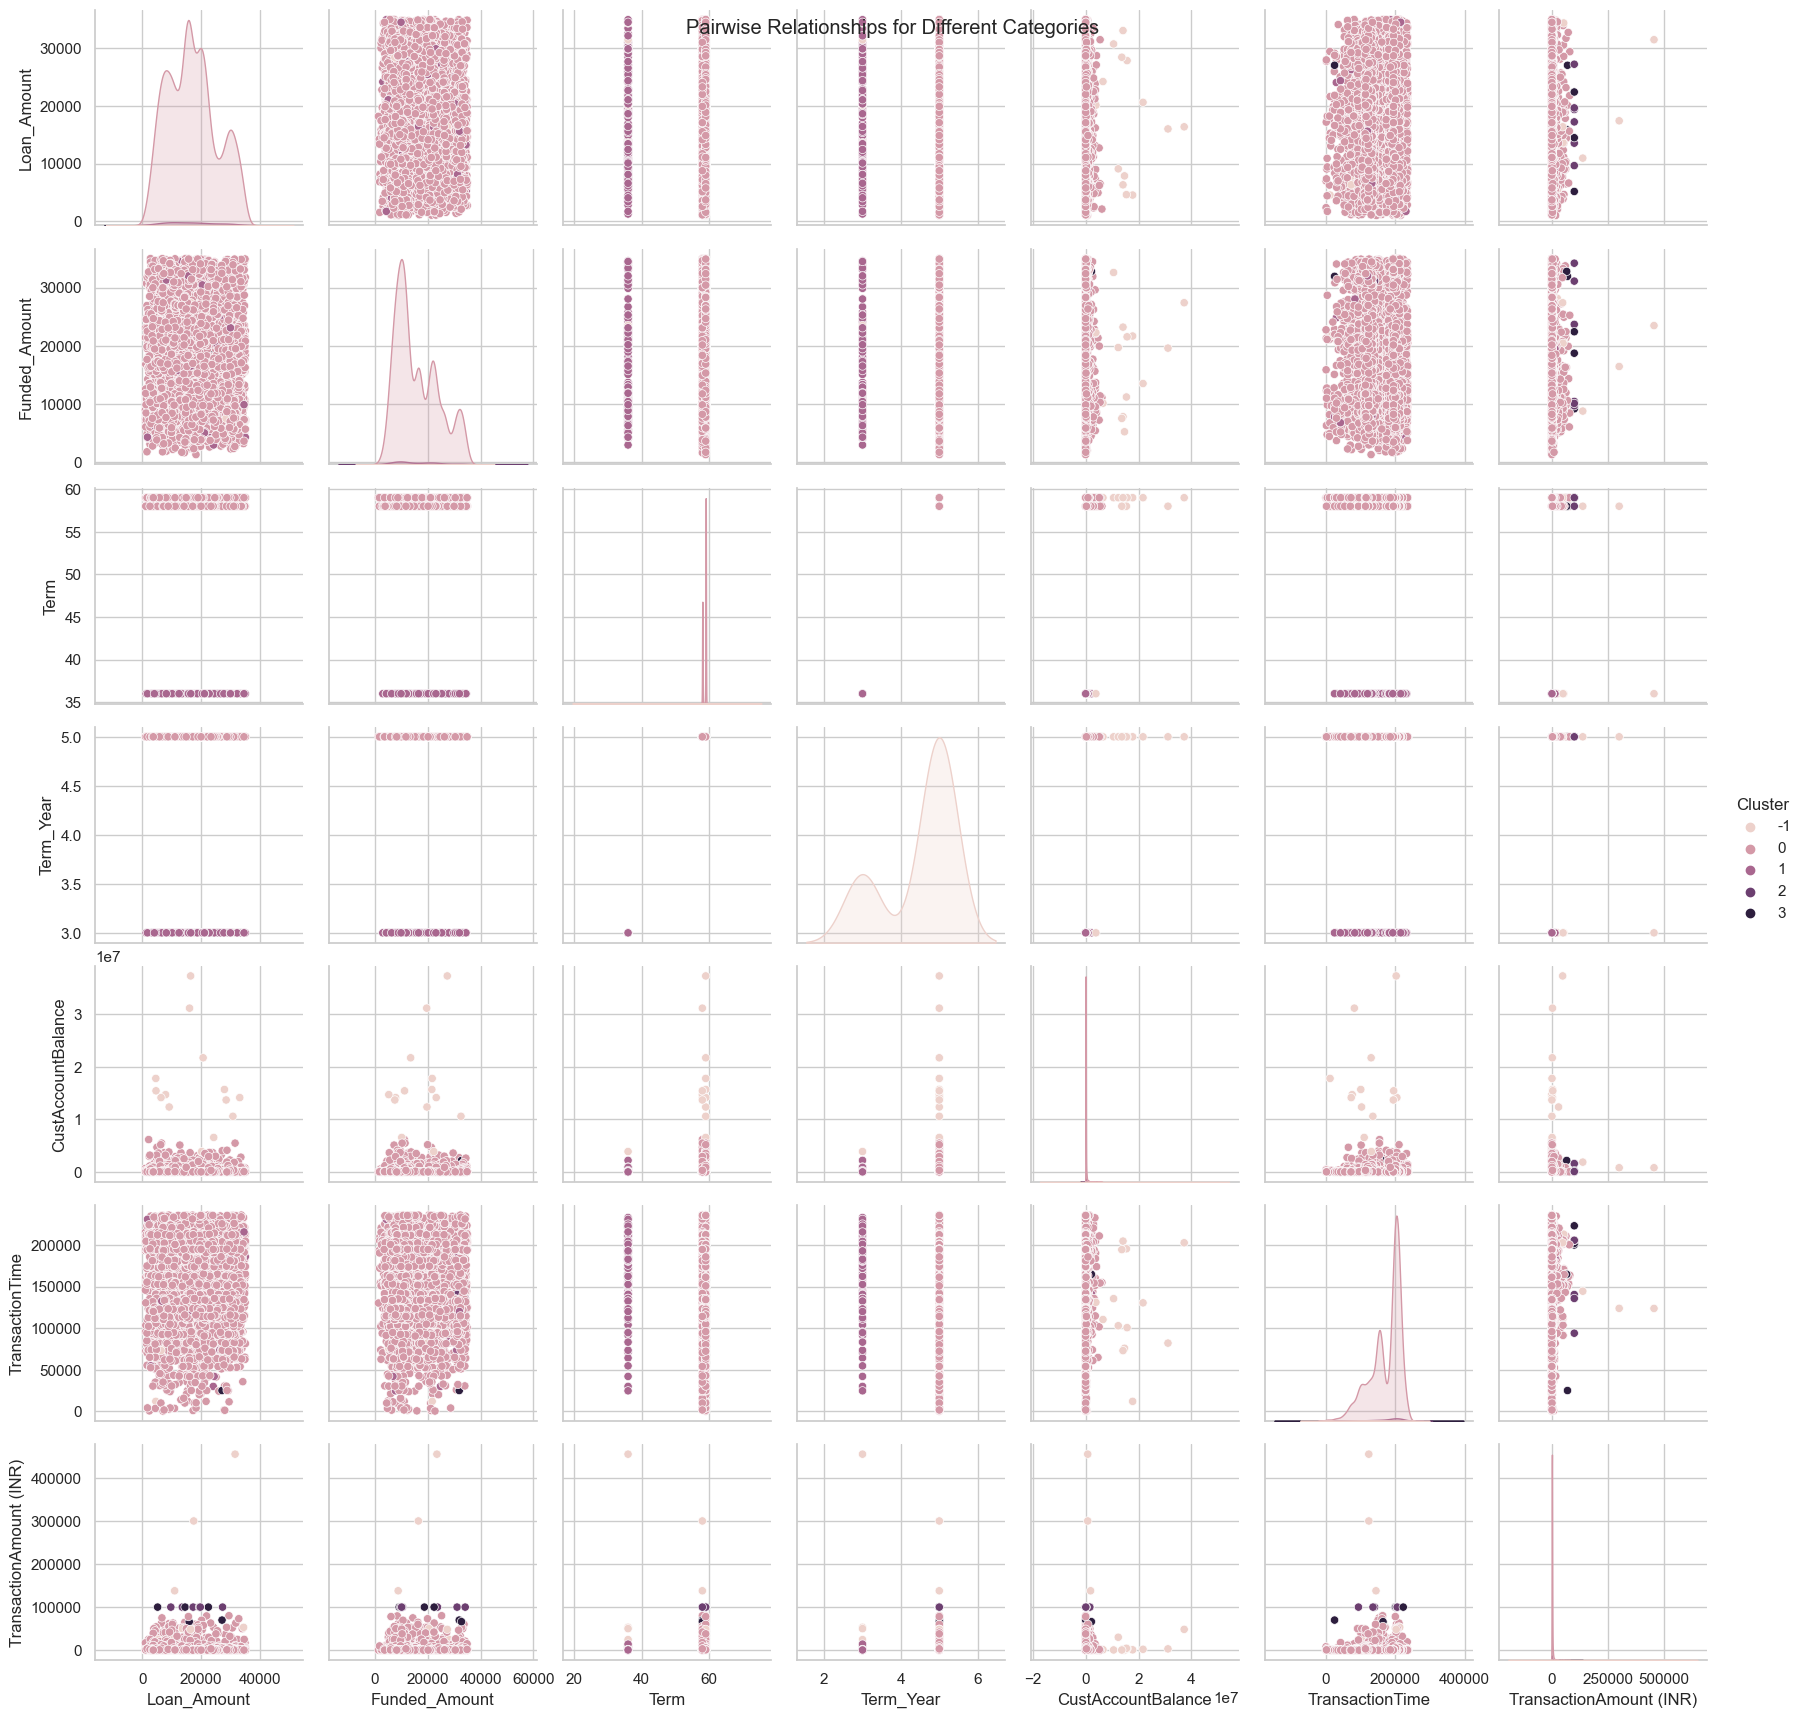

In [74]:
sns.pairplot(df, hue='Cluster', markers='o')
plt.suptitle('Pairwise Relationships for Different Categories')
plt.show()

In [ ]:
##MINIBATCHKMEANS

In [78]:
from sklearn.metrics.pairwise import pairwise_distances_argmin

# Supposons que df contient vos données
X = df.values

# Calcul des centres de cluster pour KMeans et MiniBatchKMeans
k_means_cluster_centers = k_means.cluster_centers_
mbk_cluster_centers = mbk.cluster_centers_

# Ordonner les centres de clusters MiniBatchKMeans selon l'ordre des centres de clusters KMeans
order = pairwise_distances_argmin(k_means_cluster_centers, mbk_cluster_centers)
mbk_means_cluster_centers = mbk_cluster_centers[order]

# Assigner les étiquettes de cluster pour KMeans et MiniBatchKMeans
k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)
mbk_means_labels = pairwise_distances_argmin(X, mbk_means_cluster_centers)


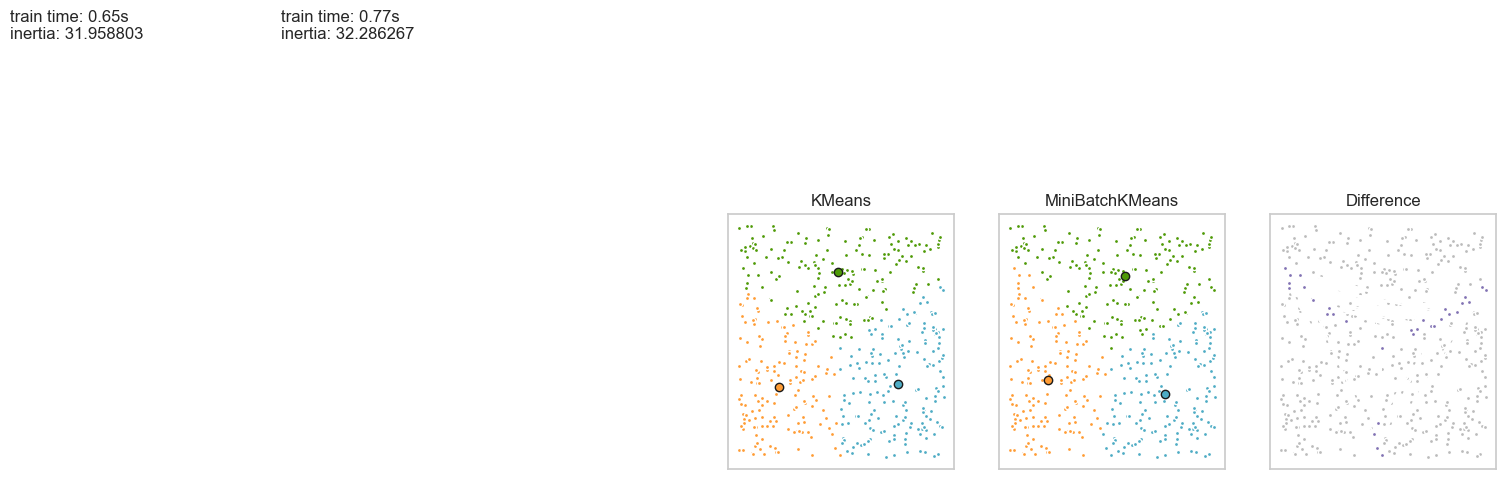

In [79]:
import matplotlib.pyplot as plt
import numpy as np

# Supposons que df contient vos données
X = df.values

fig = plt.figure(figsize=(8, 3))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ["#4EACC5", "#FF9C34", "#4E9A06"]

# KMeans
ax = fig.add_subplot(1, 3, 1)
for k, col in zip(range(n_clusters), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], "w", markerfacecolor=col, marker=".")
    ax.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=6,
    )
ax.set_title("KMeans")
ax.set_xticks(())
ax.set_yticks(())
plt.text(-3.5, 1.8, "train time: %.2fs\ninertia: %f" % (t_batch, k_means.inertia_))

# MiniBatchKMeans
ax = fig.add_subplot(1, 3, 2)
for k, col in zip(range(n_clusters), colors):
    my_members = mbk_means_labels == k
    cluster_center = mbk_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], "w", markerfacecolor=col, marker=".")
    ax.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=6,
    )
ax.set_title("MiniBatchKMeans")
ax.set_xticks(())
ax.set_yticks(())
plt.text(-3.5, 1.8, "train time: %.2fs\ninertia: %f" % (t_mini_batch, mbk.inertia_))

# Initialize the different array to all False
different = mbk_means_labels == 4
ax = fig.add_subplot(1, 3, 3)

for k in range(n_clusters):
    different += (k_means_labels == k) != (mbk_means_labels == k)

identical = np.logical_not(different)
ax.plot(X[identical, 0], X[identical, 1], "w", markerfacecolor="#bbbbbb", marker=".")
ax.plot(X[different, 0], X[different, 1], "w", markerfacecolor="m", marker=".")
ax.set_title("Difference")
ax.set_xticks(())
ax.set_yticks(())

plt.show()


In [82]:
##MEAN SHIFT

In [83]:
import numpy as np

from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

In [84]:
from sklearn.cluster import MeanShift, estimate_bandwidth
import numpy as np

# Supposons que df contient vos données
X = df.values

# Estimation de la bande passante
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

# Appliquer l'algorithme MeanShift
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("Nombre de clusters estimés : %d" % n_clusters_)


Nombre de clusters estimés : 3


Nombre de clusters estimés : 3


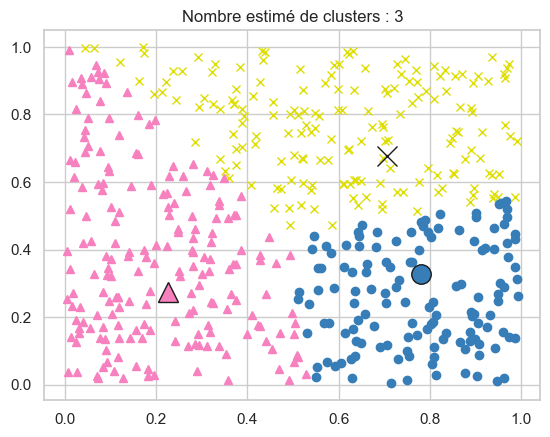

In [85]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import MeanShift, estimate_bandwidth

# Supposons que df contient vos données
# Si df contient des variables catégorielles, effectuez l'encodage one-hot
df_encoded = pd.get_dummies(df)

# Utilisez les données encodées pour l'estimation de la bande passante
X = df_encoded.values

# Estimation de la bande passante
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

# Appliquer l'algorithme MeanShift
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("Nombre de clusters estimés : %d" % n_clusters_)

# Visualisation des clusters
plt.figure(1)
plt.clf()

colors = ["#dede00", "#377eb8", "#f781bf"]
markers = ["x", "o", "^"]

for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], markers[k], color=col)
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        markers[k],
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )

plt.title("Nombre estimé de clusters : %d" % n_clusters_)
plt.show()


In [ ]:
##agglomerative(affinity propagation clustering algorithm)

In [86]:
import numpy as np

from sklearn import metrics
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs

In [88]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
import numpy as np
import pandas as pd

# Supposons que df contient vos données
# Si df contient des variables catégorielles, effectuez l'encodage one-hot
df_encoded = pd.get_dummies(df)

# Utilisez les données encodées pour l'algorithme AffinityPropagation
X = df_encoded.values

# Appliquer l'algorithme AffinityPropagation
af = AffinityPropagation(preference=-50, random_state=0).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

# Vous devez définir labels_true en fonction de votre problème
# Si vous avez des étiquettes de classe réelles, vous pouvez les utiliser
# Sinon, vous devrez les obtenir ou les définir en fonction de votre problème.
labels_true = np.zeros_like(labels)

print("Nombre estimé de clusters : %d" % n_clusters_)
print("Homogénéité : %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Complétude : %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-mesure : %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Indice Rand ajusté : %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Information mutuelle ajustée : %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)


Nombre estimé de clusters : 500
Homogénéité : 1.000
Complétude : 0.000
V-mesure : 0.000
Indice Rand ajusté : 0.000
Information mutuelle ajustée : 0.000


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning:

Affinity propagation did not converge, this model may return degenerate cluster centers and labels.



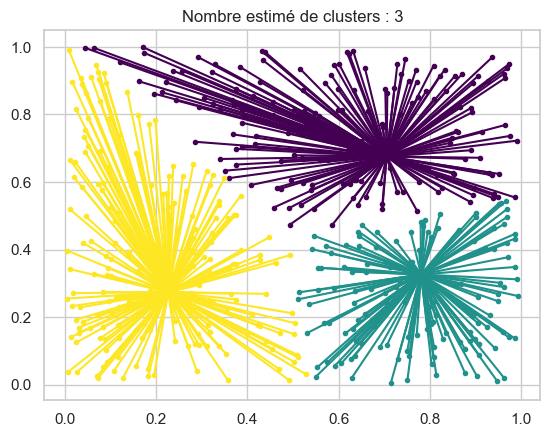

In [89]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
import pandas as pd

# Supposons que df contient vos données
# Si df contient des variables catégorielles, effectuez l'encodage one-hot
df_encoded = pd.get_dummies(df)

# Utilisez les données encodées pour l'estimation de la bande passante
X = df_encoded.values

# Estimation de la bande passante
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

# Appliquer l'algorithme MeanShift
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
n_clusters_ = len(cluster_centers)

plt.close("all")
plt.figure(1)
plt.clf()

# Utilisation de plt.cm.viridis(n_clusters_) pour définir les couleurs
colors = plt.cm.viridis(np.linspace(0, 1, n_clusters_))

for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = cluster_centers[k]
    plt.scatter(
        X[class_members, 0], X[class_members, 1], color=col, marker="."
    )
    plt.scatter(
        cluster_center[0], cluster_center[1], s=14, color=col, marker="o"
    )
    for x in X[class_members]:
        plt.plot(
            [cluster_center[0], x[0]], [cluster_center[1], x[1]], color=col
        )

plt.title("Nombre estimé de clusters : %d" % n_clusters_)
plt.show()


In [ ]:
##Adding connectivity constraints

In [90]:
# Authors : Vincent Michel, 2010
#           Alexandre Gramfort, 2010
#           Gael Varoquaux, 2010
# License: BSD 3 clause

import time as time

# The following import is required
# for 3D projection to work with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
import numpy as np

In [91]:
from sklearn.cluster import AgglomerativeClustering
import time
import pandas as pd

# Supposons que df contient vos données
# Si df contient des variables catégorielles, effectuez l'encodage one-hot
df_encoded = pd.get_dummies(df)

# Utilisez les données encodées pour le clustering hiérarchique
X = df_encoded.values

print("Compute unstructured hierarchical clustering...")
st = time.time()
ward = AgglomerativeClustering(n_clusters=6, linkage="ward").fit(X)
elapsed_time = time.time() - st
label = ward.labels_
print(f"Elapsed time: {elapsed_time:.2f}s")
print(f"Number of points: {label.size}")


Compute unstructured hierarchical clustering...
Elapsed time: 0.00s
Number of points: 500


Compute unstructured hierarchical clustering...
Elapsed time: 0.01s
Number of points: 500


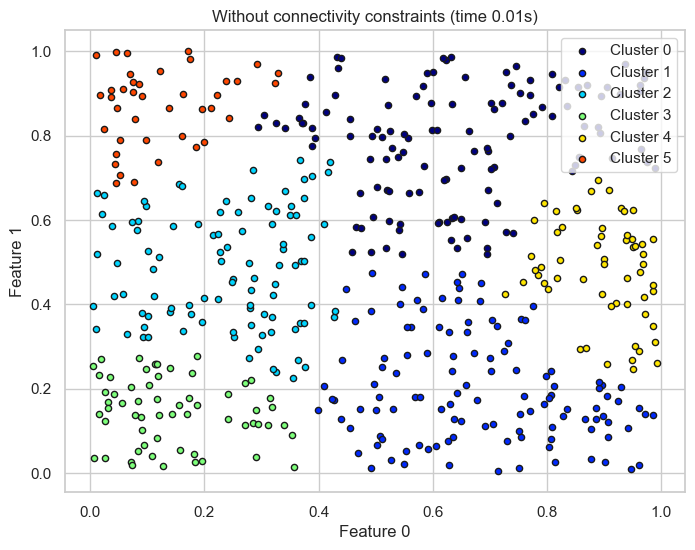

In [98]:
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.cluster import AgglomerativeClustering
import pandas as pd

# Supposons que df contient vos données
# Si df contient des variables catégorielles, effectuez l'encodage one-hot
df_encoded = pd.get_dummies(df)

# Utilisez les données encodées pour le clustering hiérarchique
X = df_encoded.values

print("Compute unstructured hierarchical clustering...")
st = time.time()
ward = AgglomerativeClustering(n_clusters=6, linkage="ward").fit(X)
elapsed_time = time.time() - st
label = ward.labels_
print(f"Elapsed time: {elapsed_time:.2f}s")
print(f"Number of points: {label.size}")

# Visualisation en 2D des deux premières dimensions
plt.figure(figsize=(8, 6))
for l in np.unique(label):
    plt.scatter(
        X[label == l, 0],
        X[label == l, 1],
        color=plt.cm.jet(float(l) / np.max(label + 1)),
        s=20,
        edgecolor="k",
        label=f"Cluster {l}",
    )

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title(f"Without connectivity constraints (time {elapsed_time:.2f}s)")
plt.legend()
plt.show()


Shape of the dataset: (500, 2)
Compute unstructured hierarchical clustering...
Elapsed time: 0.01s
Number of points: 500


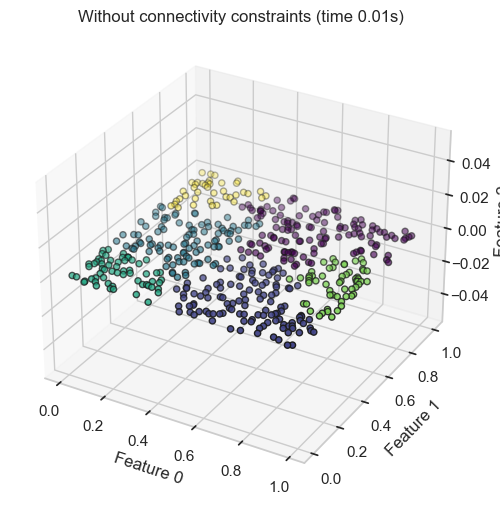

In [102]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import time
from sklearn.cluster import AgglomerativeClustering

# Supposons que df contient vos données
X = df.values  # Ne pas utiliser l'encodage one-hot ici

# Imprime la forme de l'ensemble de données
print("Shape of the dataset:", X.shape)

print("Compute unstructured hierarchical clustering...")
st = time.time()
ward = AgglomerativeClustering(n_clusters=6, linkage="ward").fit(X)
elapsed_time = time.time() - st
label = ward.labels_
print(f"Elapsed time: {elapsed_time:.2f}s")
print(f"Number of points: {label.size}")

# Visualisation en 3D des colonnes 0, 1 et 2
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:, 0], X[:, 1], c=label, cmap='viridis', s=20, edgecolor="k")

ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature 2")
ax.set_title(f"Without connectivity constraints (time {elapsed_time:.2f}s)")
plt.show()


In [ ]:
##Gaussian mixture models

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11564\2698084721.py:25: UserWarning:

Log scale: values of z <= 0 have been masked



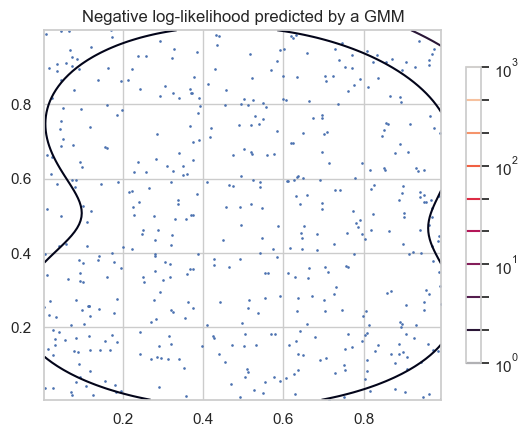

In [107]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
from sklearn import mixture

# Supposons que df contient vos données
# Si df contient des variables catégorielles, effectuez l'encodage one-hot
df_encoded = pd.get_dummies(df)

# Utilisez les données encodées comme votre ensemble d'entraînement
X_train = df_encoded.values

# Fit a Gaussian Mixture Model with two components
clf = mixture.GaussianMixture(n_components=2, covariance_type="full")
clf.fit(X_train)

# Display predicted scores by the model as a contour plot
x = np.linspace(df_encoded.min()[0], df_encoded.max()[0], 100)  # Ajustez selon vos données
y = np.linspace(df_encoded.min()[1], df_encoded.max()[1], 100)  # Ajustez selon vos données
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(
    X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10)
)
CB = plt.colorbar(CS, shrink=0.8, extend="both")

# Affichez vos données
plt.scatter(X_train[:, 0], X_train[:, 1], 0.8)

plt.title("Negative log-likelihood predicted by a GMM")
plt.axis("tight")
plt.show()


In [119]:
 df.columns

Index(['Feature1', 'Feature2'], dtype='object')

In [125]:
df1.head()

Attrition_Flag Gender Education_Level Marital_Status Card_Category  \
0  Existing Customer      M     High School        Married          Gold   
1  Existing Customer      F        Graduate         Single      Platinum   
2  Existing Customer      M        Graduate        Married        Silver   
3  Existing Customer      F     High School        Unknown     Signature   
4  Existing Customer      M      Uneducated        Married        Silver   

  Verification_Status               Loan_Title  start_date    end_date  \
0     Source Verified         Home improvement  01/11/2011  30/11/2011   
1     Source Verified  Credit card refinancing  01/11/2011  30/11/2011   
2     Source Verified       Debt consolidation  01/11/2011  30/11/2011   
3            Verified       Debt Consolidation  01/11/2011  30/11/2011   
4            Verified       Debt consolidation  01/11/2011  30/11/2011   

             bank_name  ...     EndDate RefundTypeREF RefundFREF  \
0       Allahabad Bank  ...  01/12/2015        I10874     B66381   
1          Andhra Bank  ...  01/12/2015        I07845     B86225   
2       Bank of Baroda  ...  02/12/2015        I19196     B79029   
3        Bank of India  ...  02/12/2015        I01897     B99672   
4  Bank of Maharashtra  ...  02/11/2015        I07456     B54087   

  CustomerREF.1 CustomerDOB CustLocation CustAccountBalance TransactionDate.1  \
0        G72090  10/01/1994   JAMSHEDPUR           17819.05        02/08/2016   
1        G87444  04/04/1957      JHAJJAR            2270.69        02/08/2016   
2        G48303  26/11/1996       MUMBAI           17874.44        02/08/2016   
3        G51567  14/09/1973       MUMBAI          866503.21        02/08/2016   
4        G36489  24/03/1988  NAVI MUMBAI            6714.43        02/08/2016   

   TransactionTime  TransactionAmount (INR)  
0           143207                     25.0  
1           141858                  27999.0  
2           142712                    459.0  
3           142714                   2060.0  
4           181156                   1762.5  

[5 rows x 37 columns]

In [126]:
df1.dtypes

Attrition_Flag              object
Gender                      object
Education_Level             object
Marital_Status              object
Card_Category               object
Verification_Status         object
Loan_Title                  object
start_date                  object
end_date                    object
bank_name                   object
TransactionDate             object
Client_REF                  object
Credit_Card_REF             object
RefundF_REF                 object
Point_RewardF_REF           object
Fraud_DetectionF_REF        object
Spending_Categ_REF          object
Location_REF                object
Loan_Amount                float64
Funded_Amount              float64
Term                       float64
Interest_Rate               object
Verification_Status.1       object
Loan_Title.1                object
CustomerREF                 object
Term_Year                  float64
StartDate                   object
EndDate                     object
RefundTypeREF       

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



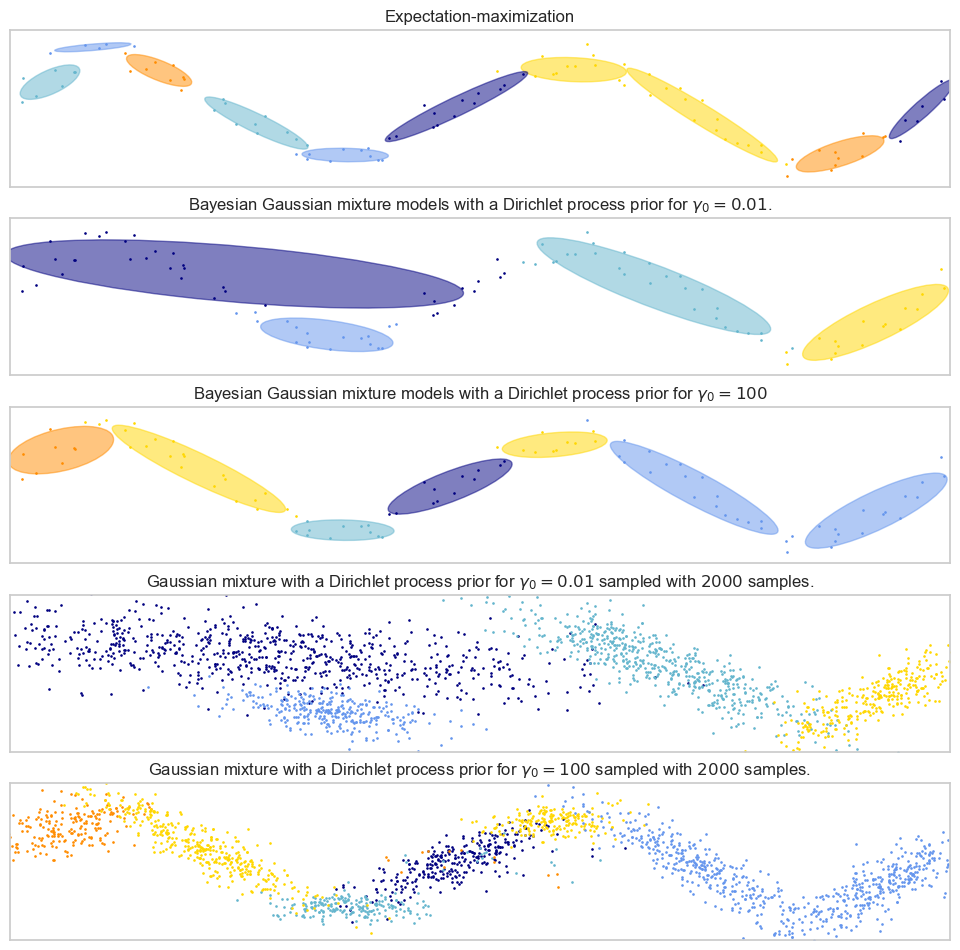

In [132]:
import itertools
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg
from sklearn import mixture
import pandas as pd

color_iter = itertools.cycle(["navy", "c", "cornflowerblue", "gold", "darkorange"])

def plot_results(df, Y, means, covariances, index, title):
    splot = plt.subplot(5, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        if not np.any(Y == i):
            continue
        plt.scatter(df.loc[Y == i, 'Gender'], df.loc[Y == i, 'Loan_Amount'], 0.8, color=color)

        angle = np.arctan(u[1] / u[0])
        angle = 180.0 * angle / np.pi
        ell = mpl.patches.Ellipse(mean, v[0], v[1], angle=180.0 + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    plt.xlim(-6.0, 4.0 * np.pi - 6.0)
    plt.ylim(-5.0, 5.0)
    plt.title(title)
    plt.xticks(())
    plt.yticks(())

def plot_samples(X, Y, n_components, index, title):
    plt.subplot(5, 1, 4 + index)
    for i, color in zip(range(n_components), color_iter):
        if not np.any(Y == i):
            continue
        plt.scatter(X[Y == i, 0], X[Y == i, 1], 0.8, color=color)

    plt.xlim(-6.0, 4.0 * np.pi - 6.0)
    plt.ylim(-5.0, 5.0)
    plt.title(title)
    plt.xticks(())
    plt.yticks(())

# Remplacez cette partie avec votre dataframe
# Vous devez vous assurer que votre dataframe a les colonnes nécessaires
# X = df1[['column1', 'column2']].values

# Exemple de création d'une dataframe avec des données aléatoires
np.random.seed(0)
n_samples = 100
df1 = pd.DataFrame({
    'Gender': np.linspace(-6.0, 4.0 * np.pi - 6.0, n_samples) + np.random.normal(0, 0.1, n_samples),
    'Loan_Amount': 3.0 * (np.sin(np.linspace(-6.0, 4.0 * np.pi - 6.0, n_samples)) + np.random.normal(0, 0.2, n_samples))
})

# Assurez-vous que df1 a les colonnes nécessaires pour la prédiction
# par exemple, remplacez 'column1' et 'column2' par les noms de colonnes réels
X = df1[['Gender', 'Loan_Amount']].values

plt.figure(figsize=(10, 10))
plt.subplots_adjust(
    bottom=0.04, top=0.95, hspace=0.2, wspace=0.05, left=0.03, right=0.97
)

# Fit a Gaussian mixture with EM using ten components
gmm = mixture.GaussianMixture(n_components=10, covariance_type="full", max_iter=100).fit(X)
plot_results(df1, gmm.predict(X), gmm.means_, gmm.covariances_, 0, "Expectation-maximization")

dpgmm = mixture.BayesianGaussianMixture(
    n_components=10,
    covariance_type="full",
    weight_concentration_prior=1e-2,
    weight_concentration_prior_type="dirichlet_process",
    mean_precision_prior=1e-2,
    covariance_prior=1e0 * np.eye(2),
    init_params="random",
    max_iter=100,
    random_state=2,
).fit(X)
plot_results(
    df1,
    dpgmm.predict(X),
    dpgmm.means_,
    dpgmm.covariances_,
    1,
    "Bayesian Gaussian mixture models with a Dirichlet process prior "
    r"for $\gamma_0=0.01$.",
)

X_s, y_s = dpgmm.sample(n_samples=2000)
plot_samples(
    X_s,
    y_s,
    dpgmm.n_components,
    0,
    "Gaussian mixture with a Dirichlet process prior "
    r"for $\gamma_0=0.01$ sampled with $2000$ samples.",
)

dpgmm = mixture.BayesianGaussianMixture(
    n_components=10,
    covariance_type="full",
    weight_concentration_prior=1e2,
    weight_concentration_prior_type="dirichlet_process",
    mean_precision_prior=1e-2,
    covariance_prior=1e0 * np.eye(2),
    init_params="kmeans",
    max_iter=100,
    random_state=2,
).fit(X)
plot_results(
    df1,
    dpgmm.predict(X),
    dpgmm.means_,
    dpgmm.covariances_,
    2,
    "Bayesian Gaussian mixture models with a Dirichlet process prior "
    r"for $\gamma_0=100$",
)

X_s, y_s = dpgmm.sample(n_samples=2000)
plot_samples(
    X_s,
    y_s,
    dpgmm.n_components,
    1,
    "Gaussian mixture with a Dirichlet process prior "
    r"for $\gamma_0=100$ sampled with $2000$ samples.",
)

plt.show()
